# Analise de dados da economia do turismo mundial

Esse é um projeto puramente academico, para o aprimoramento de habilidades de analise de dados



O desenvolvimento do projeto consiste na resolução das seguintes questões a respeito dos dados:

## Tendências Globais
### Evolução do turismo ao longo dos anos:
*   Qual o crescimento médio anual das receitas do turismo globalmente?
*   Houve algum evento global (crises econômicas, pandemias) que impactou significativamente o setor?
*   Como a inflação e o desemprego influenciaram o turismo ao longo dos anos?

---

## Relação entre turismo e PIB:
*   Existem países onde o turismo é o principal motor da economia?
*   Qual a correlação entre as receitas do turismo e o PIB dos países?
*   O turismo representa uma fatia significativa do PIB dos países em média?

---

## Impacto de crises globais:
*   Como a crise financeira de 2008 e a pandemia de COVID-19 afetaram o turismo mundial?
*   Qual o tempo de recuperação do setor após esses eventos?

---

## Análise por País e Região
### Países mais turísticos:
*   Quais são os 10 países com as maiores receitas do turismo?
*   Como a composição do turismo (entradas vs. saídas) varia entre os países?

###Turismo no Brasil:
*   Como o turismo evoluiu no Brasil?
*   Quais os fatores que impulsionam ou inibem o crescimento do turismo no Brasil?

---

##Impacto do turismo na economia nacional:
*   Qual a contribuição do turismo para o emprego em diferentes países?
*   Existe uma relação entre o turismo e o desenvolvimento de infraestrutura?

---

## Análise Comparativa
### Comparação entre países:
*   Quais os países que mais dependem do turismo para sua economia?
*   Como os países com economias semelhantes se comportam em relação ao turismo?


## Sobre os Dados


* tourism_receipts 💰: A renda total que um país gera com o turismo internacional, medida em dólares americanos correntes.

* tourism_arrivals 🌍: O número total de turistas internacionais que chegam a um país, medido em contagem.

* tourism_expenditures 🛍️: Quantidade de dinheiro gasta por turistas internacionais dentro do país, medida em dólares americanos correntes .

* tourism_exports 📈: A porcentagem das exportações totais de um país derivada das receitas do turismo internacional.

* tourism_departures ✈️: O número de cidadãos ou residentes de um país que viajam para o exterior para turismo.

* tourism_expenditures 🛫: A porcentagem das importações totais de um país gasta em turismo internacional.

* PIB 📊: Valor total de todos os bens e serviços produzidos em um país, expresso em dólares americanos correntes.

* inflação 📉: A variação percentual anual no preço médio de bens e serviços em um país.

* desemprego 👷‍♂️: A porcentagem de pessoas na força de trabalho que estão desempregadas, mas procurando ativamente por trabalho.

















## Setup

In [ ]:
!pip install plotly
!pip install cufflinks
!pip install chart_studio


!pip install sidetable
!pip install ydata-profiling
!pip install missingno

In [ ]:
#  Instalando Bibliotecas

import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import plotly.express as px

import sidetable as stb
from ydata_profiling import ProfileReport
import missingno as msno
from ipywidgets import interact, widgets

from sklearn.preprocessing import scale, minmax_scale, power_transform


In [ ]:
#  Visualizando os dados
tourism_table = pd.read_csv('world_tourism_economy_data_update.csv')

## Analise Exploratória

In [ ]:
tourism_table.tail(10)

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
6640,Virgin Islands (U.S.),VIR,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6641,Viet Nam,VNM,2023,NaN,NaN,NaN,NaN,NaN,4.297170e+11,3.252893,1.645
6642,Vanuatu,VUT,2023,NaN,NaN,NaN,NaN,NaN,1.126313e+09,NaN,NaN
6643,World,WLD,2023,NaN,NaN,NaN,NaN,NaN,1.061717e+14,5.635669,NaN
6644,Samoa,WSM,2023,NaN,NaN,NaN,NaN,NaN,9.381894e+08,NaN,NaN
6645,Kosovo,XKX,2023,NaN,NaN,NaN,NaN,NaN,1.046822e+10,4.944324,NaN
6646,"Yemen, Rep.",YEM,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6647,South Africa,ZAF,2023,NaN,NaN,NaN,NaN,NaN,3.806993e+11,6.073909,32.098
6648,Zambia,ZMB,2023,NaN,NaN,NaN,NaN,NaN,2.757796e+10,10.884532,NaN
6649,Zimbabwe,ZWE,2023,NaN,NaN,NaN,NaN,NaN,3.523137e+10,NaN,9.348


In [ ]:
tourism_table.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,6650.000000,4.289000e+03,4.949000e+03,4114.000000,2.589000e+03,4173.000000,6.424000e+03,5668.000000,3658.000000
mean,2011.000000,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,2.089999e+12,6.319369,7.961191
std,7.211645,1.291076e+11,2.049444e+08,17.758374,2.064665e+08,4.071632,7.761985e+12,18.682769,5.802565
min,1999.000000,1.000000e+05,9.000000e+02,0.000956,2.000000e+03,0.157818,1.396473e+07,-16.859691,0.039000
25%,2005.000000,2.690000e+08,5.290000e+05,4.657732,1.051000e+06,4.074702,6.087182e+09,1.865425,4.250000
50%,2011.000000,1.553000e+09,2.508000e+06,8.306797,4.634000e+06,5.754790,3.681803e+10,3.629433,6.548000
75%,2017.000000,9.144227e+09,1.818000e+07,18.506710,4.508703e+07,7.985102,4.266977e+11,6.563197,9.894692
max,2023.000000,1.863069e+12,2.403074e+09,101.966999,2.034432e+09,28.192276,1.061717e+14,557.201817,57.000000


In [ ]:
tourism_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      4289 non-null   float64
 4   tourism_arrivals      4949 non-null   float64
 5   tourism_exports       4114 non-null   float64
 6   tourism_departures    2589 non-null   float64
 7   tourism_expenditures  4173 non-null   float64
 8   gdp                   6424 non-null   float64
 9   inflation             5668 non-null   float64
 10  unemployment          3658 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


<Axes: >

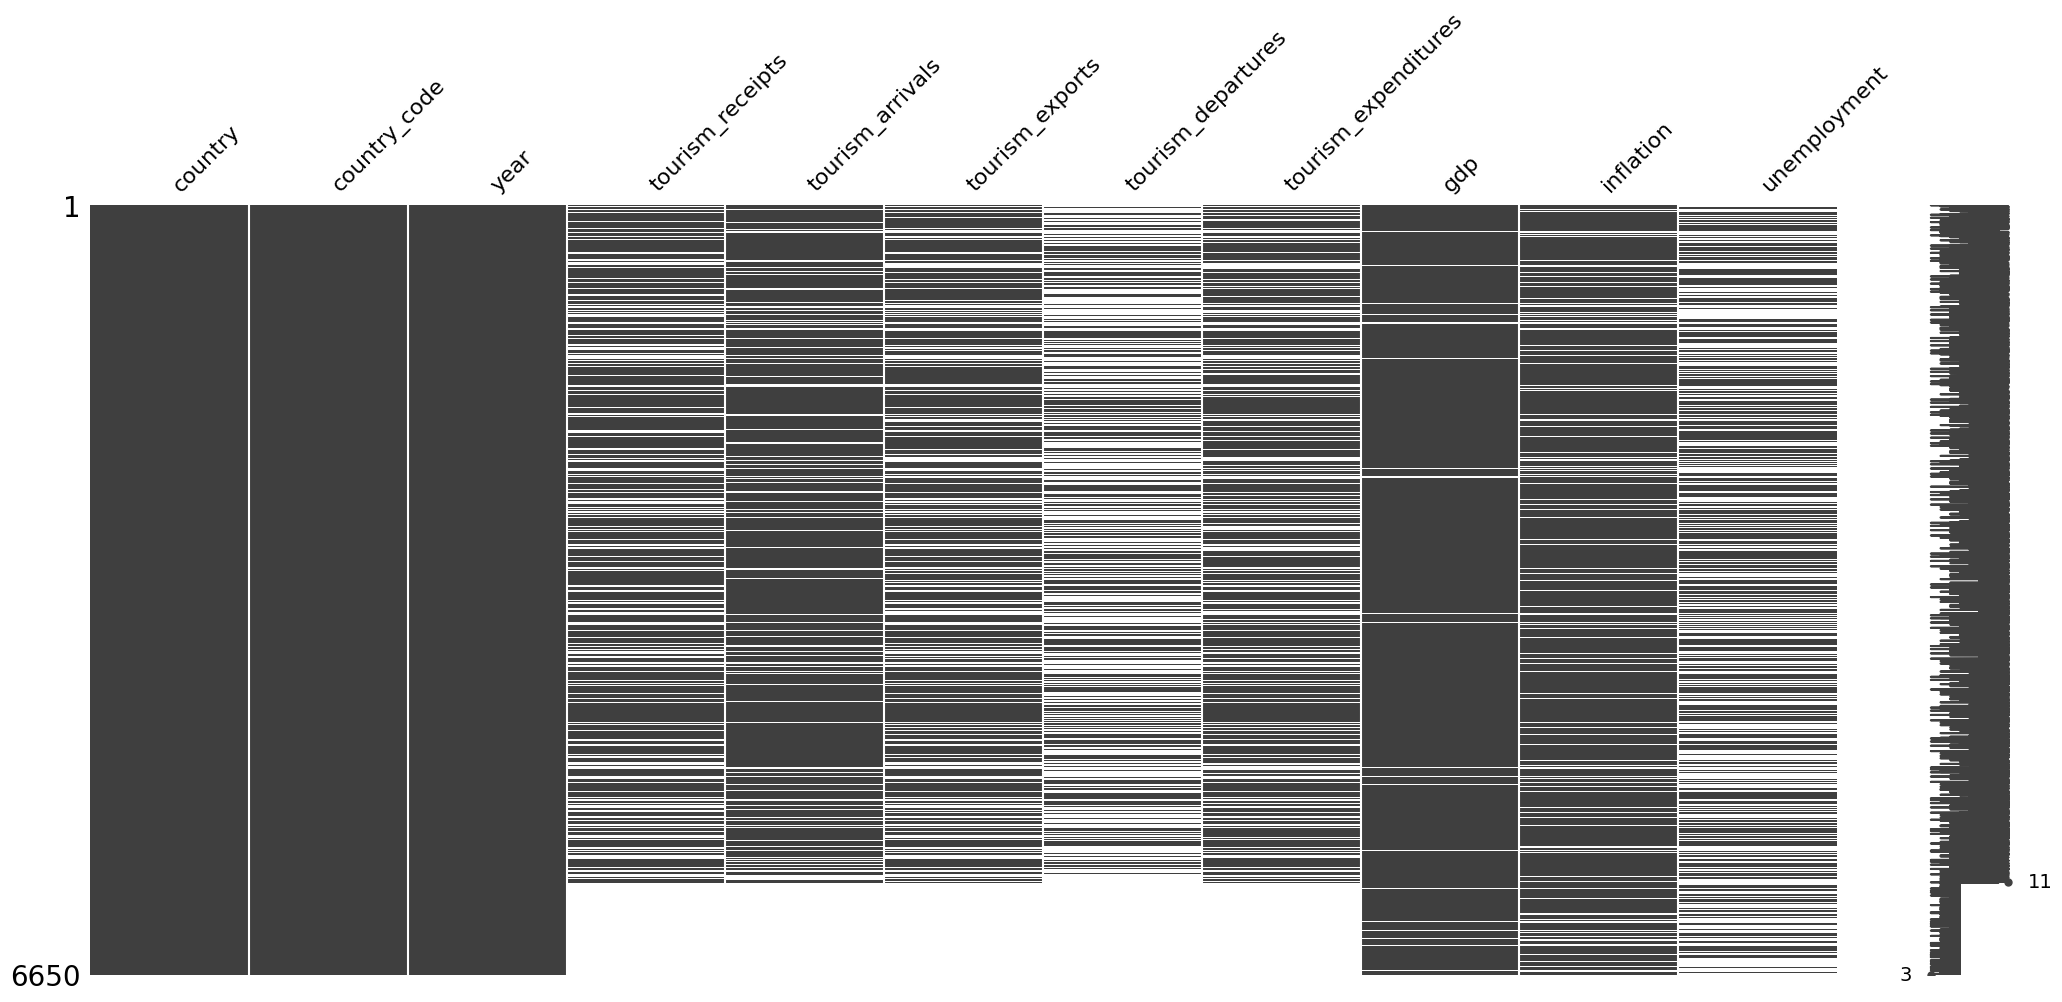

In [ ]:
msno.matrix(tourism_table)

In [ ]:
new_table = tourism_table[['year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_departures',
       'tourism_expenditures']]

new_table.groupby('year').sum().tail(6)

,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures
year,,,,,
2018,9.717955e+12,1.990523e+10,3548.394404,1.385430e+10,1421.526098
2019,9.818823e+12,2.049535e+10,2983.210918,1.413508e+10,1386.392183
2020,4.846998e+11,6.185043e+08,1330.485036,3.367081e+08,562.593903
2021,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
2022,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
2023,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000


É possível notar atraves das informações acima, que algumas colunas possuem grandes numeros de dados faltantes, adotarei como regra para tratar os dados faltantes, o preenchimento backfill, quanto aos dados dos anos de 2021, 2022 e 2023, vou dropar da base, pois nao a dados para a maioria das colunas variaveis.

E percebi que os dados de peises contem tambem regioes geograficas, territorios e dependencias.

Logo, alguns paises estao sendo calculados duas vezes, uma vez em sua linha correspontdente e outra vez dentro da regiao a que pertence.

Portanto tambem irei remover esses dados.

In [ ]:
tourism_table['country'].nunique()

# A contagem mostra 266 itens na coluna 'country', esse numero é maior do que o numero de paises conhecidos.

266

## Tratamento dos dados

### Tratamento de nulos

<ipython-input-136-d3e272c1c99b>:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Axes: >

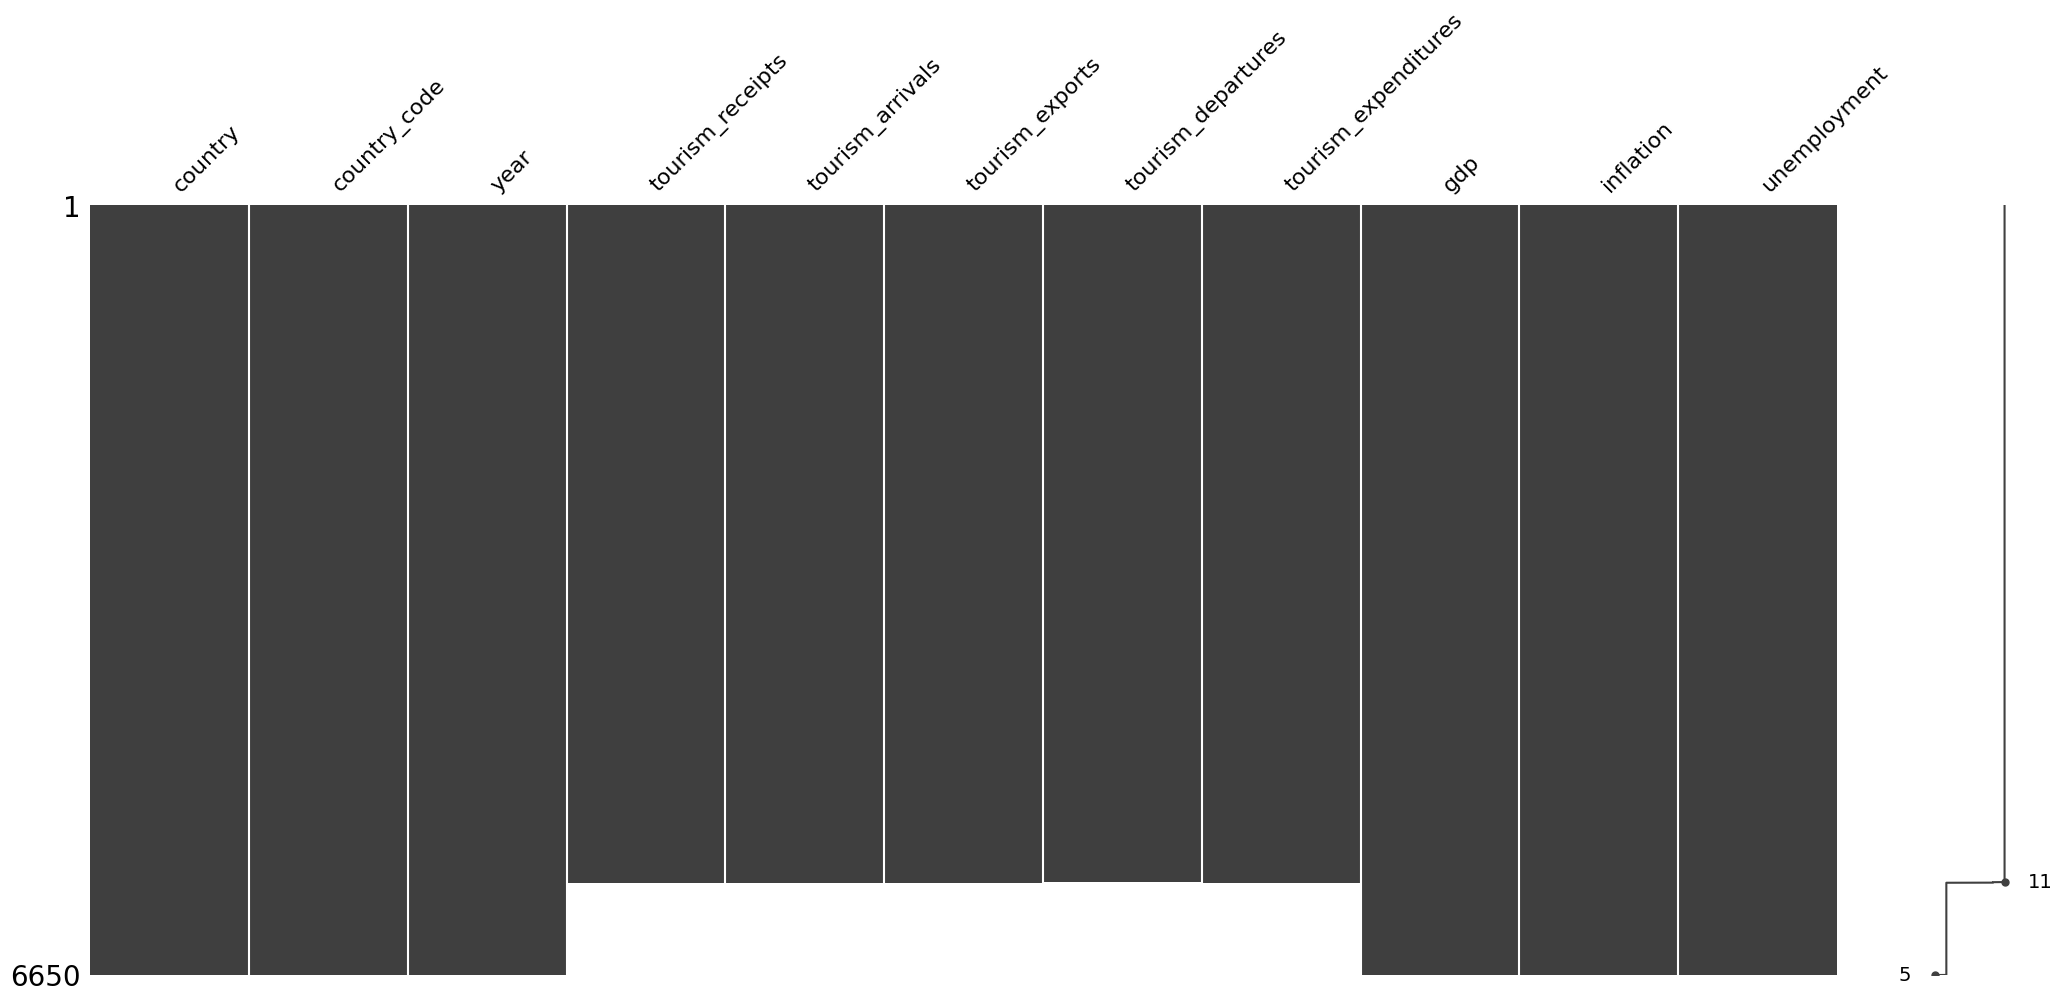

In [ ]:
# Preenchendo com o backfill

tourism_table = tourism_table.fillna(method='bfill')

msno.matrix(tourism_table)

<Axes: >

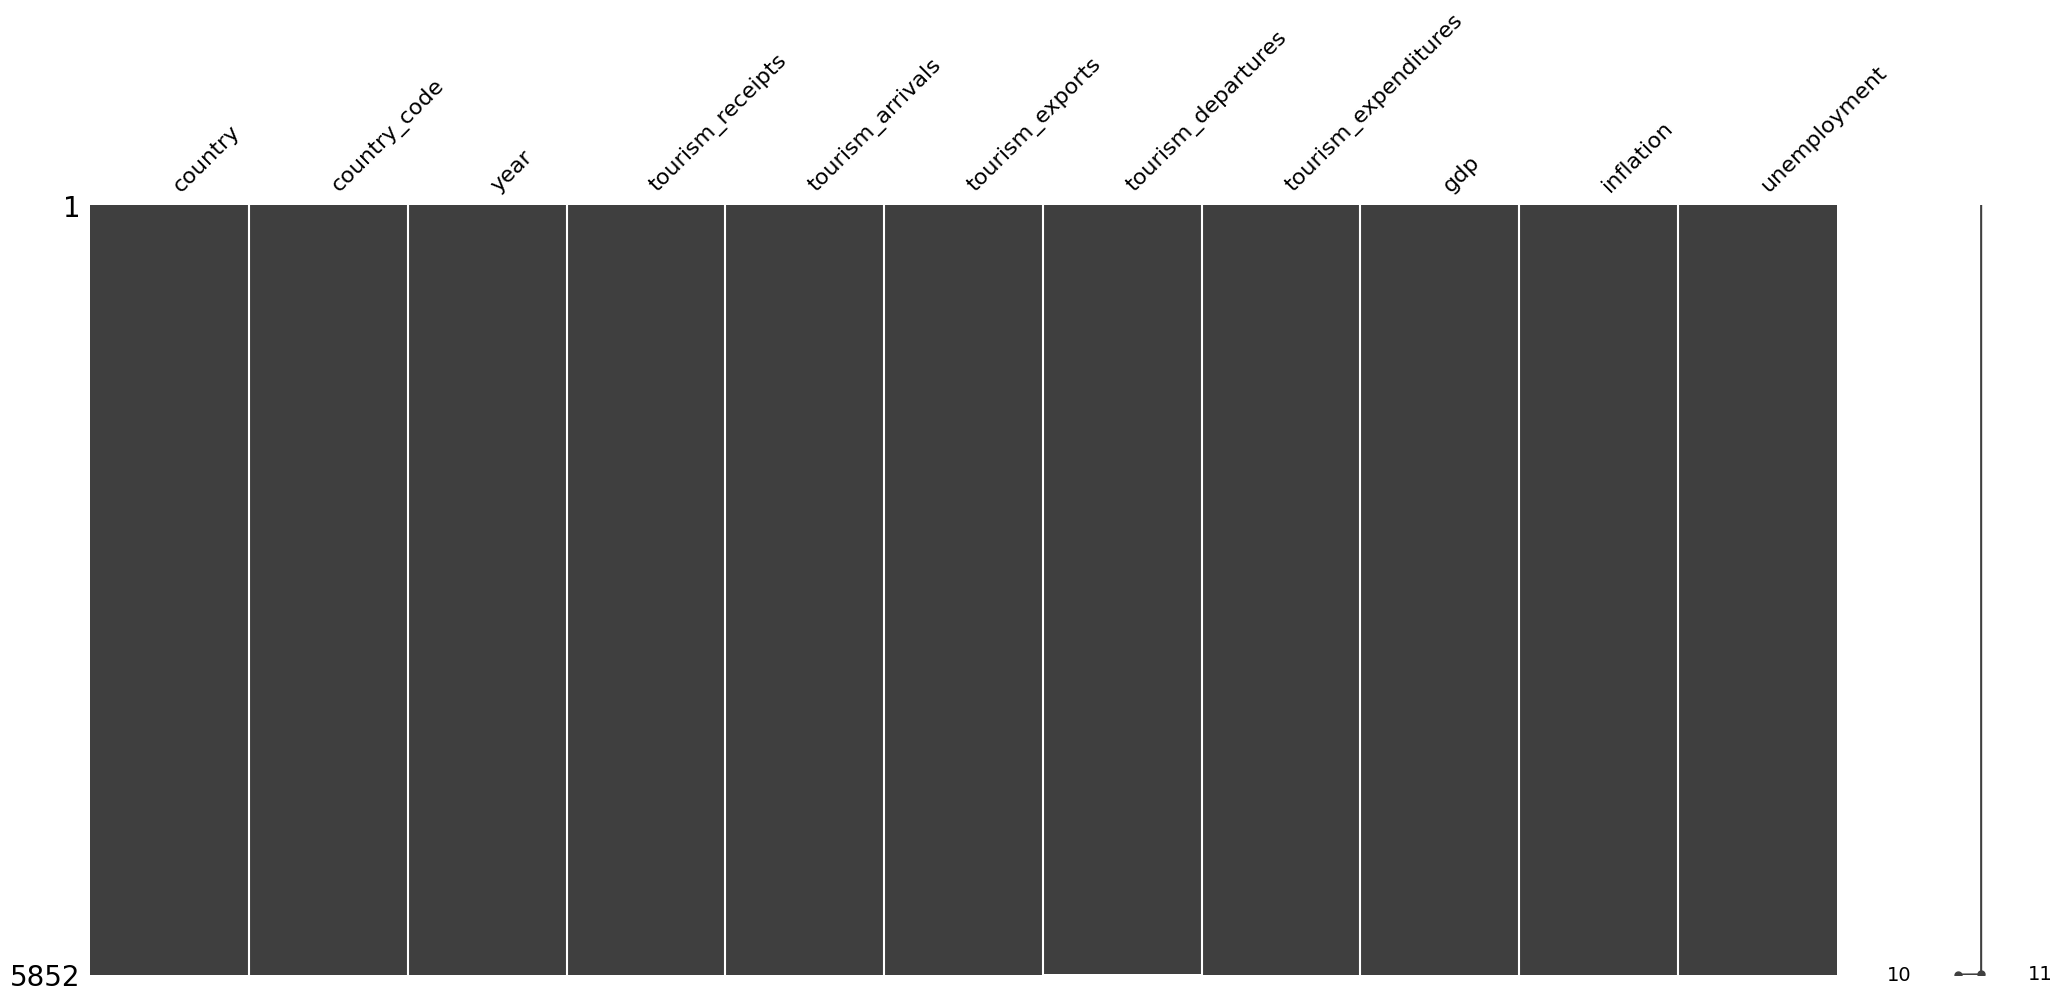

In [ ]:
# Eliminando as linhas de 2021, 2022 e 2023

tourism_table = tourism_table.query('year not in [2021, 2022, 2023]')

msno.matrix(tourism_table)

### Alterando a escala

Outra coisa importante, para melhorar a leitura dos dados, irei converter as colunas,	tourism_arrivals,	tourism_departures, gpd e tourism_receipt para bilhoes

In [ ]:
tourism_table

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,3210000.0,9.495387,1.722905e+09,2.280372,18.400
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,3210000.0,7.760536,2.654293e+11,7.819865,18.400
2,Afghanistan,AFG,1999,1.443613e+09,3.897975e+06,3.974476,3210000.0,6.147291,1.394683e+11,0.372266,18.400
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,3210000.0,6.147291,1.394683e+11,0.372266,18.400
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,3210000.0,2.489638,6.152923e+09,248.195902,18.400
...,...,...,...,...,...,...,...,...,...,...,...
5847,Kosovo,XKX,2020,2.716000e+09,3.886600e+06,2.885460,NaN,2.016499,7.717145e+09,0.198228,25.459
5848,"Yemen, Rep.",YEM,2020,2.716000e+09,3.886600e+06,2.885460,NaN,2.016499,3.379747e+11,3.210036,29.217
5849,South Africa,ZAF,2020,2.716000e+09,3.886600e+06,2.885460,NaN,2.016499,3.379747e+11,3.210036,29.217
5850,Zambia,ZMB,2020,6.600000e+07,5.020000e+05,1.253967,NaN,8.080194,1.813776e+10,15.733060,6.033


In [ ]:
for i in ['tourism_receipts', 'gdp']:
  tourism_table[i] = tourism_table[i] / 1e9


for i in ['tourism_arrivals', 'tourism_departures']:
  tourism_table[i] = tourism_table[i] / 1e6

In [ ]:
tourism_table.rename(columns={'gdp': 'gdp_billions', 'tourism_receipts' : 'tourism_receipts_billions', 'tourism_arrivals' : 'tourism_arrivals_millions', 'tourism_departures' : 'tourism_departures_millions'}, inplace=True)

In [ ]:
tourism_table.tail(10)

# que diabos é essa linha "world"?

,country,country_code,year,tourism_receipts_billions,tourism_arrivals_millions,tourism_exports,tourism_departures_millions,tourism_expenditures,gdp_billions,inflation,unemployment
5842,Virgin Islands (U.S.),VIR,2020,0.68600,8.6120,1.113603,0.0094,1.615964,4.229000,3.220934,2.103000
5843,Viet Nam,VNM,2020,3.23200,3.8370,1.113603,0.0094,1.615964,346.615739,3.220934,2.103000
5844,Vanuatu,VUT,2020,0.06700,0.0824,50.397520,0.0094,5.018555,0.909421,5.329351,4.046000
5845,World,WLD,2020,0.02306,0.0239,19.790741,0.0185,0.477719,85763.013428,1.905664,6.710846
5846,Samoa,WSM,2020,0.02306,0.0239,19.790741,0.0185,0.477719,0.868898,-1.568912,25.459000
5847,Kosovo,XKX,2020,2.71600,3.8866,2.885460,NaN,2.016499,7.717145,0.198228,25.459000
5848,"Yemen, Rep.",YEM,2020,2.71600,3.8866,2.885460,NaN,2.016499,337.974655,3.210036,29.217000
5849,South Africa,ZAF,2020,2.71600,3.8866,2.885460,NaN,2.016499,337.974655,3.210036,29.217000
5850,Zambia,ZMB,2020,0.06600,0.5020,1.253967,NaN,8.080194,18.137765,15.733060,6.033000
5851,Zimbabwe,ZWE,2020,0.06600,0.6390,1.253967,NaN,2.860109,26.867936,557.201817,5.679000


In [ ]:
tourism_table = tourism_table.query('country != "World"')

tourism_table.tail(10)

# melhorou

,country,country_code,year,tourism_receipts_billions,tourism_arrivals_millions,tourism_exports,tourism_departures_millions,tourism_expenditures,gdp_billions,inflation,unemployment
5841,British Virgin Islands,VGB,2020,0.68600,0.0830,1.113603,0.0094,1.615964,4.229000,3.220934,2.103
5842,Virgin Islands (U.S.),VIR,2020,0.68600,8.6120,1.113603,0.0094,1.615964,4.229000,3.220934,2.103
5843,Viet Nam,VNM,2020,3.23200,3.8370,1.113603,0.0094,1.615964,346.615739,3.220934,2.103
5844,Vanuatu,VUT,2020,0.06700,0.0824,50.397520,0.0094,5.018555,0.909421,5.329351,4.046
5846,Samoa,WSM,2020,0.02306,0.0239,19.790741,0.0185,0.477719,0.868898,-1.568912,25.459
5847,Kosovo,XKX,2020,2.71600,3.8866,2.885460,NaN,2.016499,7.717145,0.198228,25.459
5848,"Yemen, Rep.",YEM,2020,2.71600,3.8866,2.885460,NaN,2.016499,337.974655,3.210036,29.217
5849,South Africa,ZAF,2020,2.71600,3.8866,2.885460,NaN,2.016499,337.974655,3.210036,29.217
5850,Zambia,ZMB,2020,0.06600,0.5020,1.253967,NaN,8.080194,18.137765,15.733060,6.033
5851,Zimbabwe,ZWE,2020,0.06600,0.6390,1.253967,NaN,2.860109,26.867936,557.201817,5.679


### Excluindo dados de "não paises"

In [ ]:
# Com uma ajudinha de IA, aqui esta a lista de itens que não são paises.

# Lista de itens que não são países
excluir = [
    # Regiões geográficas e econômicas
    "Africa Eastern and Southern", "Africa Western and Central", "Arab World",
    "Caribbean small states", "Central Europe and the Baltics",
    "East Asia & Pacific", "East Asia & Pacific (excluding high income)",
    "Europe & Central Asia", "Europe & Central Asia (excluding high income)",
    "European Union", "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)", "High income",
    "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)",
    "Least developed countries: UN classification", "Low income",
    "Lower middle income", "Low & middle income", "Late-demographic dividend",
    "Middle East & North Africa", "Middle East & North Africa (excluding high income)",
    "Middle income", "North America", "OECD members", "Other small states",
    "Pre-demographic dividend", "Pacific island small states",
    "Post-demographic dividend", "South Asia", "Sub-Saharan Africa",
    "Sub-Saharan Africa (excluding high income)", "Small states",
    "Upper middle income",

    # Territórios e dependências
    "American Samoa", "Aruba", "Bermuda", "British Virgin Islands",
    "Cayman Islands", "Channel Islands", "Curacao", "Faroe Islands",
    "French Polynesia", "Gibraltar", "Greenland", "Guam",
    "Hong Kong SAR, China", "Isle of Man", "Macao SAR, China",
    "New Caledonia", "Northern Mariana Islands", "Puerto Rico",
    "St. Martin (French part)", "Sint Maarten (Dutch part)",
    "Turks and Caicos Islands", "Virgin Islands (U.S.)", "West Bank and Gaza",

    # Classificações de organismos internacionais
    "Early-demographic dividend", "IBRD only", "IDA & IBRD total",
    "IDA total", "IDA blend", "IDA only", "Not classified",

    # Países com reconhecimento limitado
    "Kosovo",

    # Faltou esses
    "Euro area", "East Asia & Pacific (IDA & IBRD countries)",
    "Europe & Central Asia (IDA & IBRD countries)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Middle East & North Africa (IDA & IBRD countries)",
    "South Asia (IDA & IBRD)", "Sub-Saharan Africa (IDA & IBRD countries)"
]

In [ ]:
tourism_table = tourism_table.query('country not in @excluir')

tourism_table['country'].nunique()

# Agora senti firmeza

193

### Receita com turismo maior que o PIB???

In [ ]:
pib_receita = tourism_table[['country', 'gdp_billions', 'tourism_receipts_billions']]

pib_receita = pib_receita.groupby('country').sum()

# descobri que alguns paises tem a receita com turismo maior que o proprio pib... isso nao faz sentido nenhum
# vou escluir esses paises do dataset

pib_receita = pib_receita[pib_receita['tourism_receipts_billions'] > pib_receita['gdp_billions']]

pib_receita.head()

,gdp_billions,tourism_receipts_billions
country,,
Andorra,64.306112,1125.820249
Antigua and Barbuda,28.231489,336.681000
Burundi,40.344790,99.252000
Central African Republic,37.859256,352.521865
Chad,182.629566,1381.949050


In [ ]:
paises_pib_receita = pib_receita.index.tolist()

tourism_table = tourism_table.query('country not in @paises_pib_receita')

tourism_table['country'].nunique()

# agora sim

168

## Tendências Globais
### Evolução do turismo ao longo dos anos:


### Crescimento anual e crises econômicas

*   Qual o crescimento médio anual das receitas do turismo globalmente?
*   Houve algum evento global (crises econômicas, pandemias) que impactou significativamente o setor?

In [ ]:
# criando uma tabela com as informações receita, ano, inflação e desemprego
tab1 = tourism_table[['year', 'tourism_receipts_billions']].groupby('year').sum().reset_index()
tab2 = tourism_table[['year', 'inflation', 'unemployment']].groupby('year').mean().reset_index()
receipt_x_year = pd.merge(tab1, tab2, on='year')

# pra facilitar a leitura e interpretação, alterando de milhao para trilhao
receipt_x_year['tourism_receipts_billions'] = receipt_x_year['tourism_receipts_billions'] / 1000
receipt_x_year.rename(columns={'tourism_receipts_billions': 'tourism_receipts_trillions'}, inplace=True)

In [ ]:
receipt_x_year['tourism_receipts_trillions'] = (receipt_x_year['tourism_receipts_trillions']).round(2)

In [ ]:
receipt_x_year.head()

,year,tourism_receipts_trillions,inflation,unemployment
0,1999,0.89,14.696805,8.880258
1,2000,0.78,14.173297,8.668267
2,2001,0.77,10.695708,9.012687
3,2002,0.59,6.511507,9.653333
4,2003,0.64,6.477103,9.237455


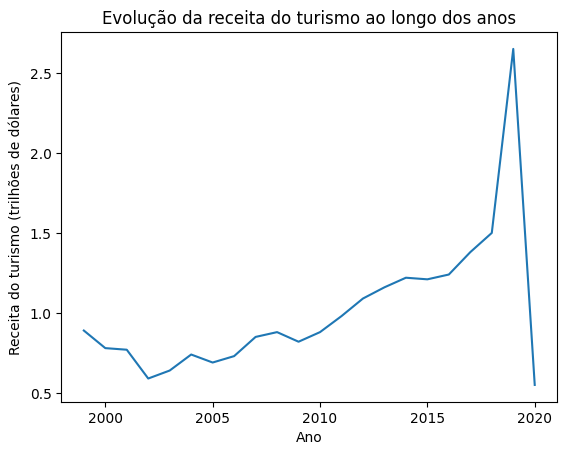

In [ ]:
# grafico mosta o crescimento da receita, mas ainda preciso calcular a media de crescimento ao ano
fig = sns.lineplot(receipt_x_year, x='year', y='tourism_receipts_trillions')

plt.title('Evolução da receita do turismo ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Receita do turismo (trilhões de dólares)')
plt.show()

É possivel notar um crescimento consistente no setor com o passar dos anos.

A queda apurada no ano de 2020 é resultado da pandemia muldial do Covid-19, onde o setor teve sua pior queda, encerrando o periodo com numeros totais que se comparavam aos anos 90.

In [ ]:
receipt_x_year['growth average'] = receipt_x_year['tourism_receipts_trillions'].pct_change()

receipt_x_year.head()

,year,tourism_receipts_trillions,inflation,unemployment,growth average
0,1999,0.89,14.696805,8.880258,NaN
1,2000,0.78,14.173297,8.668267,-0.123596
2,2001,0.77,10.695708,9.012687,-0.012821
3,2002,0.59,6.511507,9.653333,-0.233766
4,2003,0.64,6.477103,9.237455,0.084746


In [ ]:
growth = receipt_x_year['growth average'].dropna()

growth.mean()

np.float64(0.028494256400161233)

A média de crescimento calculada foi de **2,31%**.

Entretando essa media foi muito afetada pela informação do ano de 2020, no qual hou ve uma queda expressiva no volume do turismo internacional em função da pandemia do Covid-19.

In [ ]:
growth = growth.drop(21)

In [ ]:
growth.mean()

np.float64(0.06954161072960326)

Até o acontecimento citado, o setor vinha num cresciemnto de **6,57%** ao ano.

### Inflação e desemprego

*   Como a inflação e o desemprego influenciaram o turismo ao longo dos anos?

<Axes: >

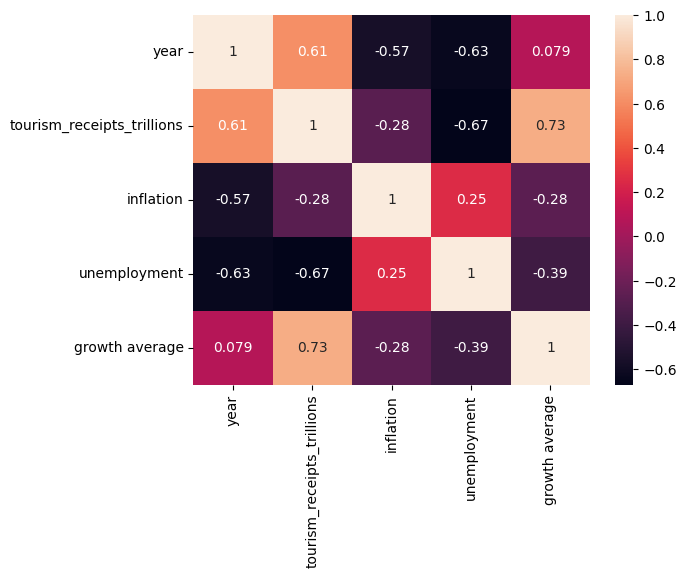

In [ ]:
sns.heatmap(receipt_x_year.corr(), annot=True)

Podemos analisar com base na matriz de correlação que existe uma correlação negativa moderada entre a inflação/desemprego e a receita ao ano.

A correlação negativa indica que as informações se movem em direções opostas.

Logo podemos dizer que o aumento da inflação ou desemprego afeta, negativamente, a receita.

## Relação entre turismo e PIB:
*   Existem países onde o turismo é o principal motor da economia?
*   Qual a correlação entre as receitas do turismo e o PIB dos países?
*   O turismo representa uma fatia significativa do PIB dos países em média?

In [ ]:
tourism_x_gdp = tourism_table[['country', 'tourism_receipts_billions', 'gdp_billions']]

# convertendo tourism receipt e gpd para trilhao
for i in ['tourism_receipts_billions', 'gdp_billions']:
  tourism_x_gdp[i] = tourism_x_gdp[i] / 1000

tourism_x_gdp.rename(columns={'tourism_receipts_billions': 'tourism_receipts_trillions', 'gdp_billions': 'gdp_trillions'}, inplace=True)

tourism_x_gdp = tourism_x_gdp.groupby('country').sum()

tourism_x_gdp.head()

,tourism_receipts_trillions,gdp_trillions
country,,
Afghanistan,0.021759,0.411849
Albania,0.030375,0.225926
Algeria,0.937939,3.296002
Angola,0.010155,1.402080
Argentina,0.095965,8.372090


In [ ]:
# seguinte meu parceiro, vou criar uma coluna pra calcular a representatividade do turismo no pib

from os import rename
tourism_x_gdp['representativeness'] = tourism_x_gdp['tourism_receipts_trillions'] / tourism_x_gdp['gdp_trillions']

tourism_x_gdp = tourism_x_gdp.sort_values('representativeness', ascending=False)

tourism_x_gdp['representativeness'] = (tourism_x_gdp['representativeness'] *100).round(2)
tourism_x_gdp.rename(columns={'representativeness': 'representativeness (%)'}, inplace=True)

tourism_x_gdp.head(10)

,tourism_receipts_trillions,gdp_trillions,representativeness (%)
country,,,
St. Vincent and the Grenadines,0.012810,0.015021,85.29
Latvia,0.401194,0.502755,79.80
Tajikistan,0.083611,0.111242,75.16
"Gambia, The",0.011659,0.027323,42.67
Somalia,0.045447,0.107897,42.12
Liechtenstein,0.042033,0.106543,39.45
New Zealand,1.127600,3.136226,35.95
Seychelles,0.008310,0.024895,33.38
Vanuatu,0.004053,0.013146,30.83


Varios paises tem o turismo como grande fonte de receita, porem o campeão é São Vicente e Granadinas, com o turismo representando impressionantes **85,29%** do PIB da nação.

Segue grafico só pra ficar mais bonito de ver

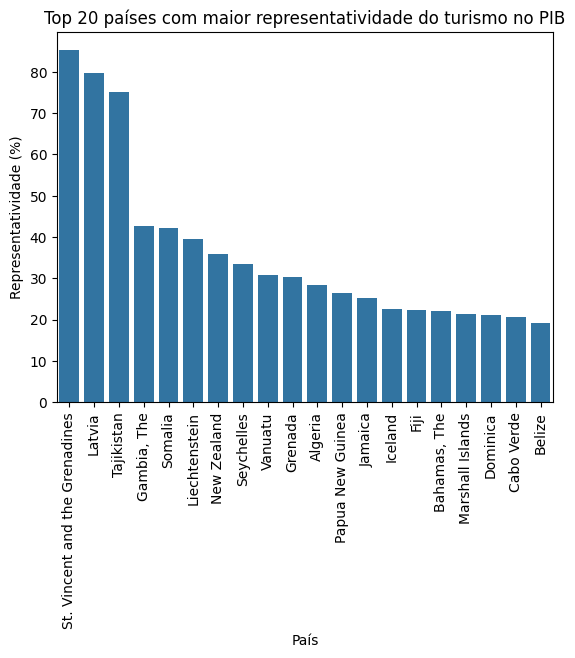

In [ ]:
fig = sns.barplot(tourism_x_gdp.head(20), x='country', y='representativeness (%)')

plt.title('Top 20 países com maior representatividade do turismo no PIB')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Representatividade (%)')
plt.show()

Quanto a representatividade do turismo no PIB global...

In [ ]:
(tourism_x_gdp['tourism_receipts_trillions'].sum() / tourism_x_gdp['gdp_trillions'].sum()) * 100

np.float64(1.6128347040009008)

Durante o período apurado foi de **1,61%**

## Impacto de crises globais

*   Como a crise financeira de 2008 e a pandemia de COVID-19 afetaram o turismo mundial?
*   Qual o tempo de recuperação do setor após esses eventos?

### Covid-19

Sobre o covid acho que ja deu pra entender né? Já tratei disso mais cedo.

Mas não custa nada relembrar...



<Axes: xlabel='year', ylabel='tourism_receipts_trillions'>

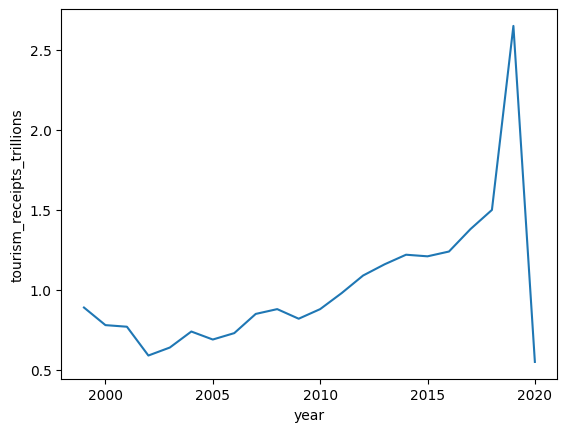

In [ ]:
sns.lineplot(receipt_x_year, x='year', y='tourism_receipts_trillions')

A queda apurada no ano de 2020 é resultado da pandemia muldial do Covid-19, onde o setor teve sua pior queda, encerrando o periodo com numeros totais que se comparavam aos anos 90.

Não ha dados dos aconteceimentos apos a pandemia do Covid-19, logo não poderei analisar a recuperação do setor, mas fica de lição de casa encontrar os dados dos anos seguintes.

### Crise de 2008

In [ ]:
table_2005_2012 = tourism_table.query('year in [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]')
table_2005_2012 = table_2005_2012[['year', 'tourism_receipts_billions']]
table_2005_2012 = table_2005_2012.groupby('year').sum().reset_index()

table_2005_2012['tourism_receipts_billions'] = table_2005_2012['tourism_receipts_billions'] / 1000
table_2005_2012.rename(columns={'tourism_receipts_billions': 'tourism_receipts_trillions'}, inplace=True)

# Receita do turismo mundial ano a ano em trilhoes
table_2005_2012

,year,tourism_receipts_trillions
0,2005,0.686039
1,2006,0.727071
2,2007,0.848959
3,2008,0.881158
4,2009,0.817849
5,2010,0.877770
6,2011,0.979638
7,2012,1.092203


<Axes: xlabel='year', ylabel='tourism_receipts_trillions'>

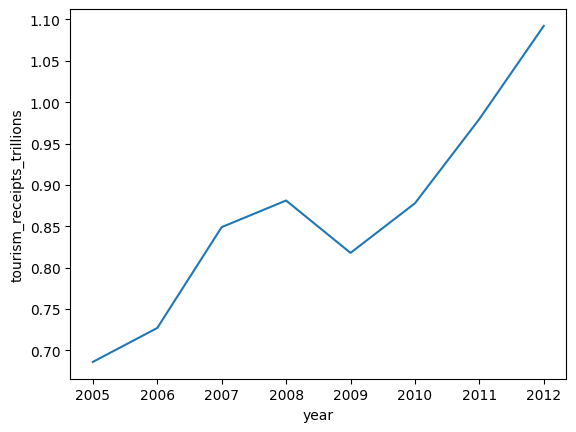

In [ ]:
sns.lineplot(table_2005_2012, x='year', y='tourism_receipts_trillions')

# AAH, agora deu pra sentir o baki

In [ ]:
receipt_2008 = table_2005_2012[table_2005_2012['year'] == 2008]['tourism_receipts_trillions'].values[0]
receipt_2009 = table_2005_2012[table_2005_2012['year'] == 2009]['tourism_receipts_trillions'].values[0]

drop = receipt_2008 - receipt_2009

drop

np.float64(0.06330851024187156)

Do inicio ao fim do ano de 2008, houve uma queda na receita global do turismo de **135 bilhoes** de dolares.

Entretanto o setor recuperou seus numeros durante o ano de **2010**.

## Análise por País e Região

### Países mais turísticos:
*   Quais são os 10 países com as maiores receitas do turismo?
*   Como a composição do turismo (entradas vs. saídas) varia entre os países?

In [ ]:
tourism_table['country'].nunique()

168

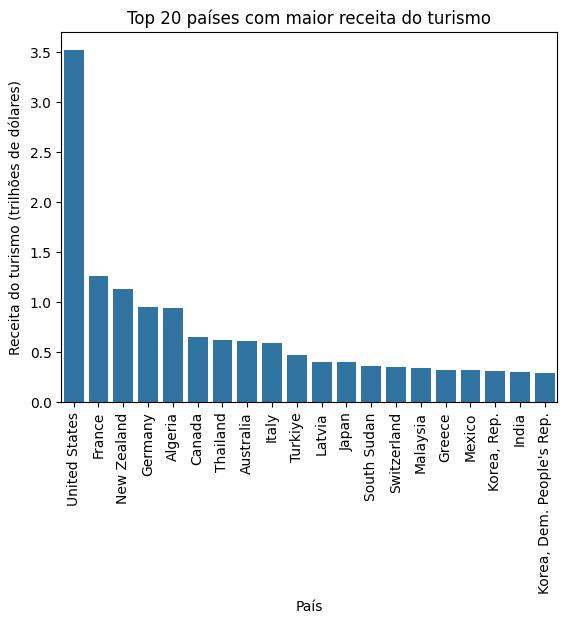

In [ ]:
# geralzão

top_paises = tourism_table[['country', 'tourism_receipts_billions']].groupby('country').sum().sort_values('tourism_receipts_billions', ascending=False).head(20)

top_paises['tourism_receipts_billions'] = (top_paises['tourism_receipts_billions'] / 1000).round(2)
top_paises.rename(columns={'tourism_receipts_billions': 'tourism_receipts_trillions'}, inplace=True)

fig = sns.barplot(top_paises, x='country', y='tourism_receipts_trillions')

plt.title('Top 20 países com maior receita do turismo')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Receita do turismo (trilhões de dólares)')
plt.show()

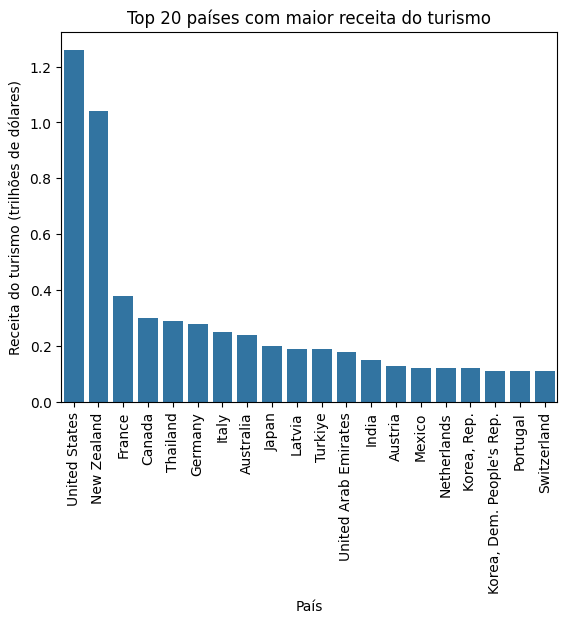

In [ ]:
# de 2015 a 2020

top_paises = tourism_table[['country', 'year', 'tourism_receipts_billions']]
top_paises = top_paises.query('year >= 2015 and year <= 2020')
top_paises = top_paises[['country', 'tourism_receipts_billions']].groupby('country').sum().sort_values('tourism_receipts_billions', ascending=False).head(20)
top_paises

top_paises['tourism_receipts_billions'] = (top_paises['tourism_receipts_billions'] / 1000).round(2)
top_paises.rename(columns={'tourism_receipts_billions': 'tourism_receipts_trillions'}, inplace=True)

fig = sns.barplot(top_paises, x='country', y='tourism_receipts_trillions')

plt.title('Top 20 países com maior receita do turismo')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Receita do turismo (trilhões de dólares)')
plt.show()

###Turismo no Brasil:
*   Como o turismo evoluiu no Brasil?